# Задача 5 <br>
Выполнила: Борисова Мария, 120М группа

Задание - ЯМР, определение распределений пор по размерам

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

Загрузка данных

In [2]:
sample_i124 = open('И124.prn', 'r', encoding='cp1251')
sample_124 = [[i[0:7], i[7:]] for i in sample_i124.read().split('\n')]
sample_i124.close
sample_124 = pd.DataFrame(sample_124[:-1], dtype='float', columns=['time, ms', 'amplitude'])
sample_124['time, ms'] = sample_124['time, ms']/1000
sample_124

,"time, ms",amplitude
0,0.0005,1020.156466
1,0.0010,1013.586268
2,0.0015,1001.464677
3,0.0020,999.287867
4,0.0025,943.045233
...,...,...
29995,14.9980,-10.969489
29996,14.9985,4.657891
29997,14.9990,17.013071
29998,14.9995,-29.296794


In [3]:
sample_i4529 = open('И4529.prn', 'r', encoding='cp1251')
sample_4529 = [[i[0:7], i[7:]] for i in sample_i4529.read().split('\n')]
sample_i4529.close
sample_4529 = pd.DataFrame(sample_4529[:-1], dtype='float', columns=['time, ms', 'amplitude'])
sample_4529['time, ms'] = sample_4529['time, ms']/1000
sample_4529

,"time, ms",amplitude
0,0.0005,764.486998
1,0.0010,756.074783
2,0.0015,732.980731
3,0.0020,737.813449
4,0.0025,747.133972
...,...,...
29995,14.9980,4.674915
29996,14.9985,29.701928
29997,14.9990,8.016949
29998,14.9995,-15.133918


In [4]:
sample_rb122 = open('РБ122.prn', 'r', encoding='cp1251')
sample_122 = [[i[0:7], i[7:]] for i in sample_rb122.read().split('\n')]
sample_rb122.close
sample_122 = pd.DataFrame(sample_122[:-1], dtype='float', columns=['time, ms', 'amplitude'])
sample_122['time, ms'] = sample_122['time, ms']/1000
sample_122

,"time, ms",amplitude
0,0.0005,4960.997216
1,0.0010,4917.876253
2,0.0015,4733.957282
3,0.0020,4712.508763
4,0.0025,4557.186705
...,...,...
4995,2.4980,2.708877
4996,2.4985,-9.472115
4997,2.4990,0.548544
4998,2.4995,4.934563


Визуализация

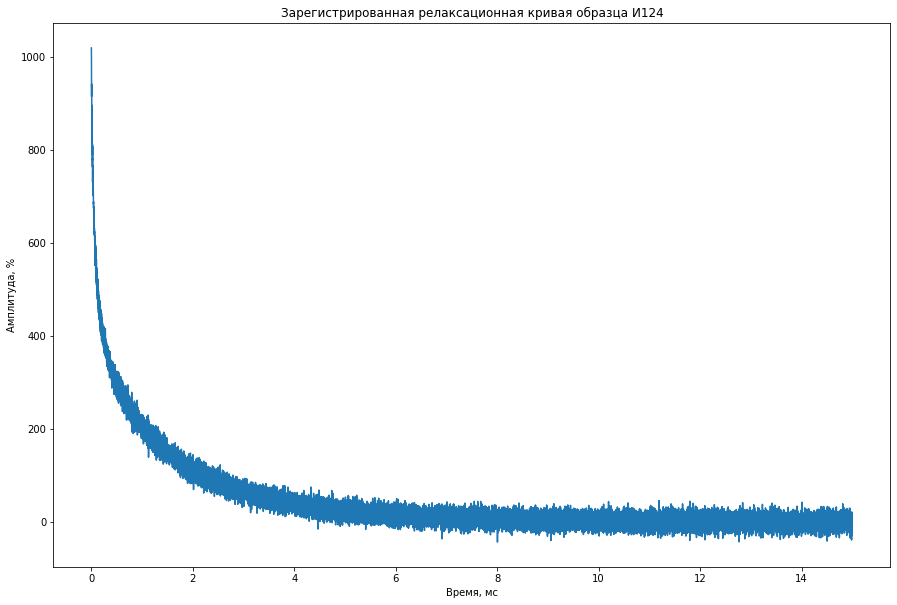

In [5]:
figure(figsize=(15, 10))
plt.plot(sample_124['time, ms'], sample_124['amplitude'], '-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца И124');

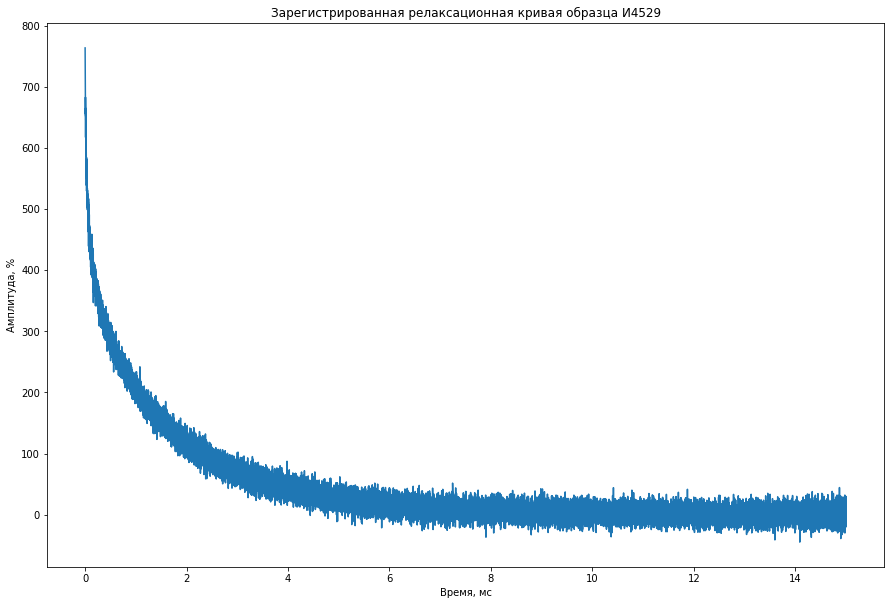

In [6]:
figure(figsize=(15, 10))
plt.plot(sample_4529['time, ms'], sample_4529['amplitude'], '-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца И4529');

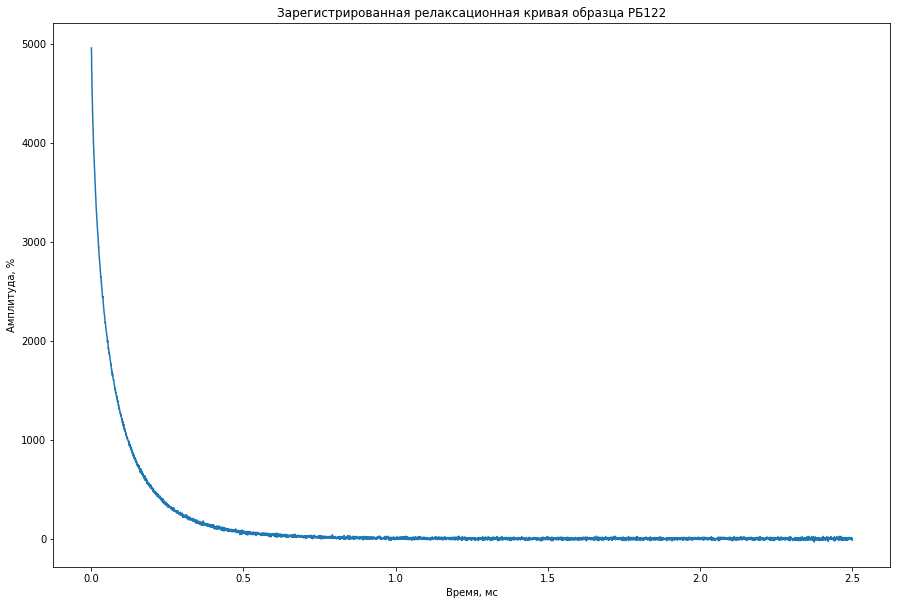

In [7]:
figure(figsize=(15, 10))
plt.plot(sample_122['time, ms'], sample_122['amplitude'], '-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца РБ122');

In [8]:
#Времена релаксации
T2 = np.logspace(-1,3, 56)

Определеление $B(T_2)$ по нескольким моделям

$ NMR(t) = \int\limits_a ^ b B(T_2)e^{-t/T_2}dT_2$ <br>
где, a - $ T_{2_{min}} $, b - $ T_{2_{max}} $

In [9]:
methods = [LinearRegression(positive=True), Lasso(), Ridge()]
param = {'LR':{},'Lasso': [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100]}],
               'Ridge': [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100]}]}

In [10]:
def nmr_basic(t, T_2):
    return np.exp(-t/T_2)

In [11]:
def best_model_chooser(results):
    return max(results, key=lambda x: x[1])[0]  

<b> Образец И124

In [12]:
time_124 = np.array(sample_124['time, ms']).reshape(-1,1)
amplitude_124 = np.array(sample_124['amplitude']).reshape(-1,1)

In [13]:
grid_result_124 = []
for est, par in zip(methods, param.keys()):
    model = GridSearchCV(est, param[par]).fit(nmr_basic(time_124, T2), amplitude_124)
    grid_result_124.append((model.best_estimator_, model.best_score_))

c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+05, tolerance: 8.788e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+06, tolerance: 2.819e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [14]:
grid_result_124

[(LinearRegression(positive=True), 0.2713274241596001),
 (Lasso(alpha=0.0001), 0.26965757133950563),
 (Ridge(alpha=0.1), 0.28488290119453047)]

In [15]:
best_model_124 = best_model_chooser(grid_result_124)
best_model_124

Ridge(alpha=0.1)

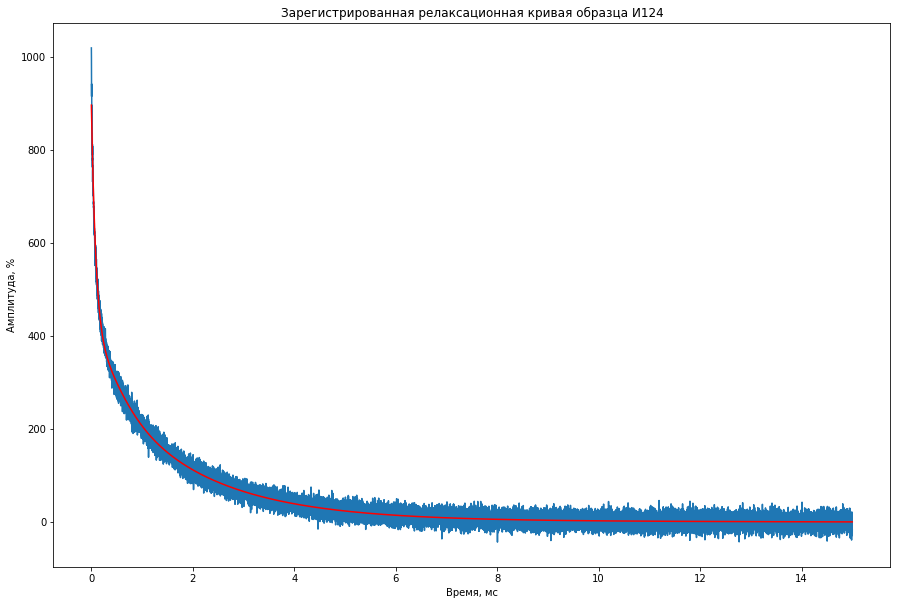

In [16]:
figure(figsize=(15, 10))
plt.plot(sample_124['time, ms'], sample_124['amplitude'], '-')
plt.plot(time_124, best_model_124.predict(nmr_basic(time_124, T2)), 'r-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца И124');

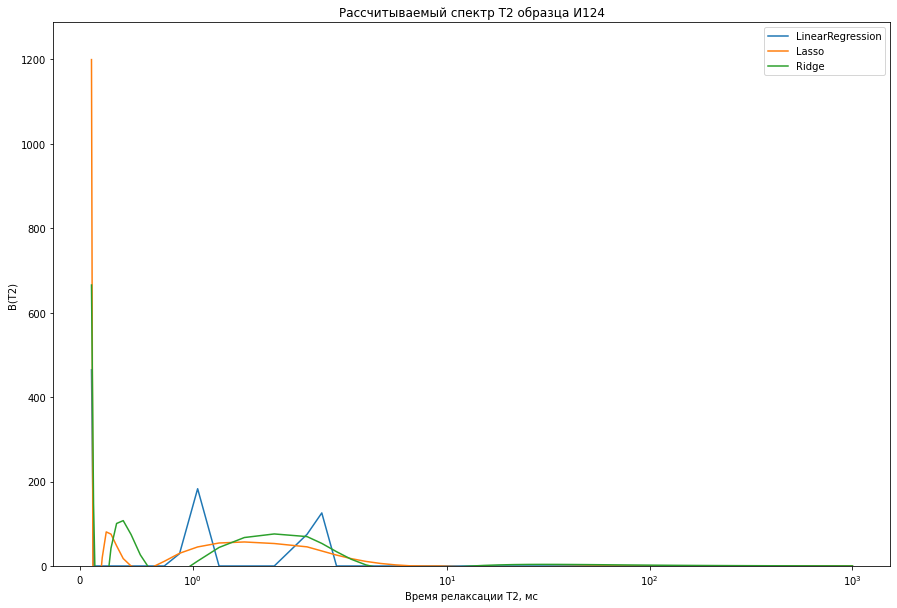

In [17]:
figure(figsize=(15, 10))
legend = []
for model in grid_result_124:
    plt.plot(T2, model[0].coef_.reshape(-1))
    legend += [str(model[0]).split('(')[0]]
plt.xscale("symlog")
plt.ylim(0, )
plt.xlabel('Время релаксации T2, мс')
plt.ylabel('B(T2)')
plt.title('Рассчитываемый спектр T2 образца И124')
plt.legend(legend)

<b> Образец И4529

In [18]:
time_4529 = np.array(sample_4529['time, ms']).reshape(-1,1)
amplitude_4529 = np.array(sample_4529['amplitude']).reshape(-1,1)

In [19]:
grid_result_4529 = []
for est, par in zip(methods, param.keys()):
    model = GridSearchCV(est, param[par]).fit(nmr_basic(time_4529, T2), amplitude_4529)
    grid_result_4529.append((model.best_estimator_, model.best_score_))

c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e+05, tolerance: 9.349e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+06, tolerance: 2.265e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [20]:
grid_result_4529

[(LinearRegression(positive=True), -8.290568371751727e+17),
 (Lasso(alpha=0.0001), 0.31157923301144363),
 (Ridge(alpha=0.1), 0.31339845306775155)]

In [21]:
best_model_4529 = best_model_chooser(grid_result_4529)
best_model_4529

Ridge(alpha=0.1)

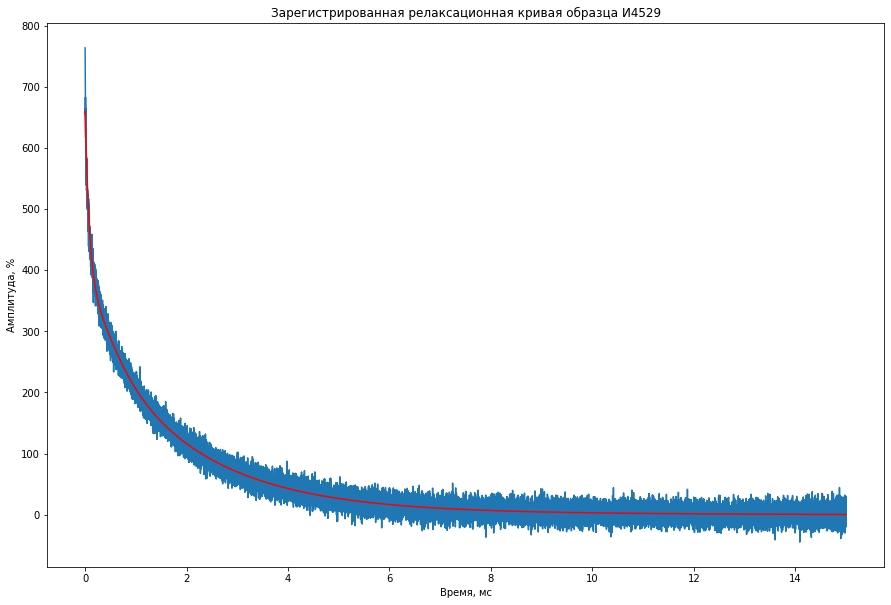

In [22]:
figure(figsize=(15, 10))
plt.plot(sample_4529['time, ms'], sample_4529['amplitude'], '-')
plt.plot(time_4529, best_model_4529.predict(nmr_basic(time_4529, T2)), 'r-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца И4529');

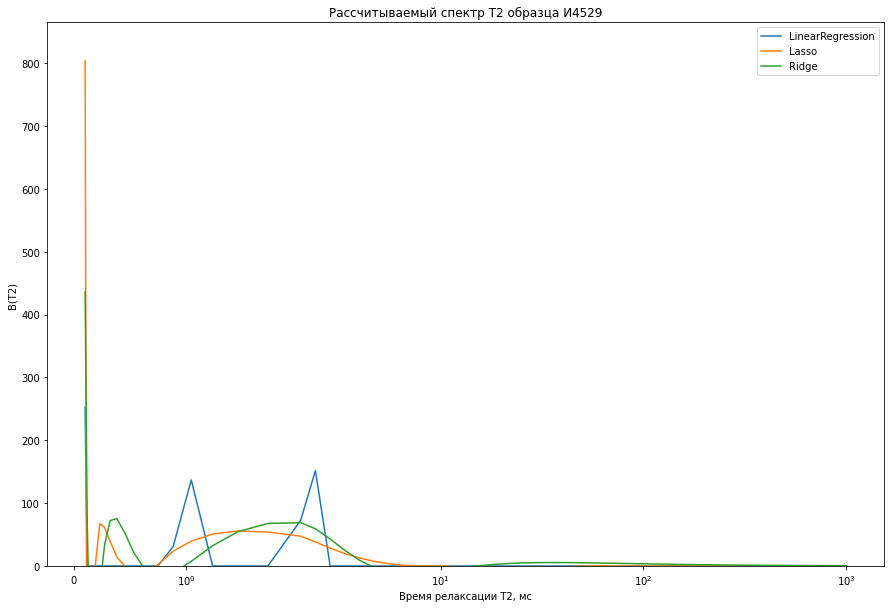

In [23]:
figure(figsize=(15, 10))
legend = []
for model in grid_result_4529:
    plt.plot(T2, model[0].coef_.reshape(-1))
    legend += [str(model[0]).split('(')[0]]
plt.xscale("symlog")
plt.ylim(0, )
plt.xlabel('Время релаксации T2, мс')
plt.ylabel('B(T2)')
plt.title('Рассчитываемый спектр T2 образца И4529')
plt.legend(legend)

<b> Образец РБ122

In [24]:
time_122 = np.array(sample_122['time, ms']).reshape(-1,1)
amplitude_122 = np.array(sample_122['amplitude']).reshape(-1,1)

In [25]:
grid_result_122 = []
for est, par in zip(methods, param.keys()):
    model = GridSearchCV(est, param[par]).fit(nmr_basic(time_122, T2), amplitude_122)
    grid_result_122.append((model.best_estimator_, model.best_score_))

c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.227e+03, tolerance: 8.588e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.692e+06, tolerance: 1.288e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\Маша\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [26]:
grid_result_122

[(LinearRegression(positive=True), -0.037675066348112504),
 (Lasso(alpha=1), -0.600696115540359),
 (Ridge(alpha=1), -1.397498762528946)]

In [27]:
best_model_122 = best_model_chooser(grid_result_122)
best_model_122

LinearRegression(positive=True)

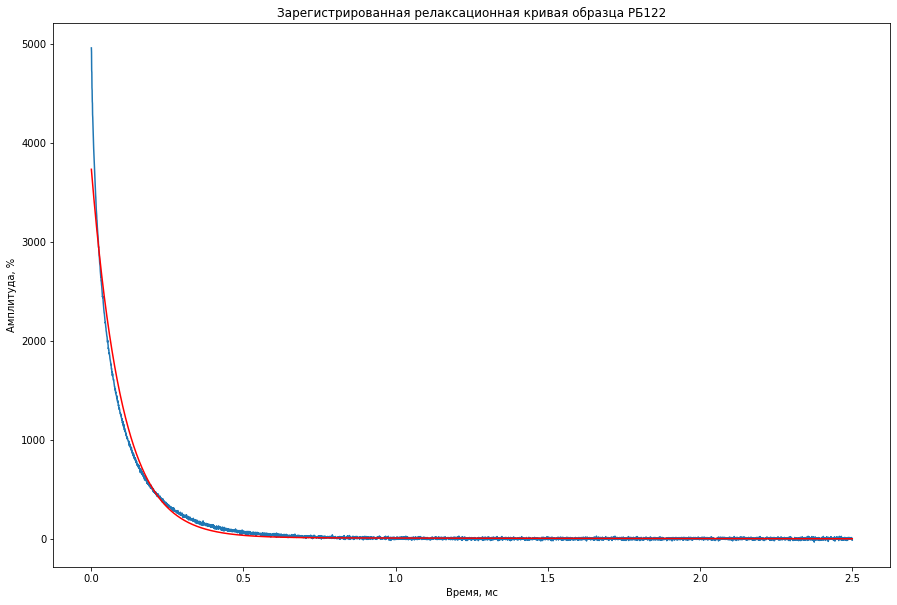

In [28]:
figure(figsize=(15, 10))
plt.plot(sample_122['time, ms'], sample_122['amplitude'], '-')
plt.plot(time_122, best_model_122.predict(nmr_basic(time_122, T2)), 'r-')
plt.xlabel('Время, мс')
plt.ylabel('Амплитуда, %')
plt.title('Зарегистрированная релаксационная кривая образца РБ122');

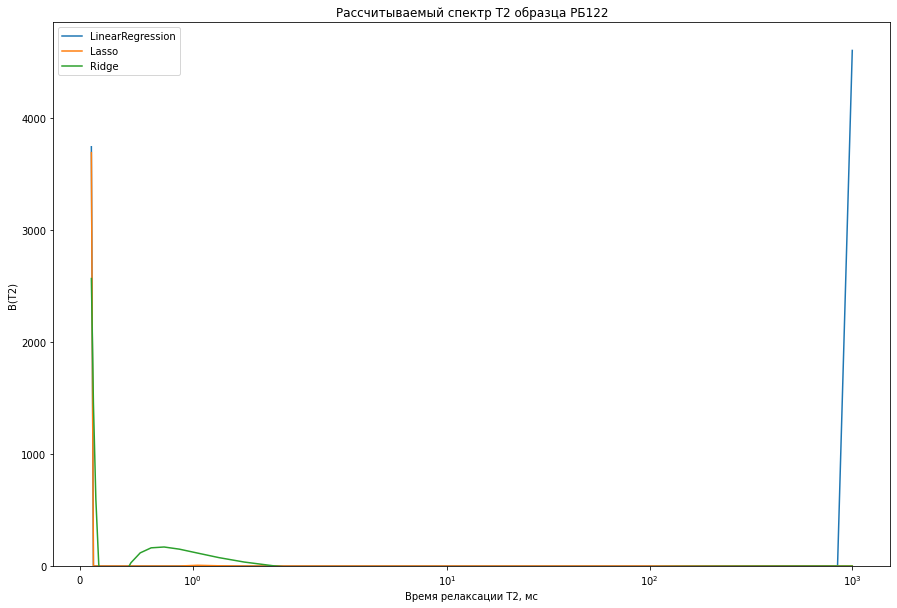

In [29]:
figure(figsize=(15, 10))
legend = []
for model in grid_result_122:
    plt.plot(T2, model[0].coef_.reshape(-1))
    legend += [str(model[0]).split('(')[0]]
plt.xscale("symlog")
plt.ylim(0, )
plt.xlabel('Время релаксации T2, мс')
plt.ylabel('B(T2)')
plt.title('Рассчитываемый спектр T2 образца РБ122')
plt.legend(legend)